In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
# import pandas_bokeh
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('plotting.backend', 'pandas_bokeh')
# pandas_bokeh.output_notebook()

In [2]:
df = pd.read_csv('opsd_germany_daily.csv', parse_dates=['Date'])
df.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [3]:
# df.iloc[-10:,:].Consumption.plot()

In [4]:
df.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [5]:
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [6]:
df.groupby(df.Date.dt.year).count()

,Date,Consumption,Wind,Solar,Wind+Solar
Date,,,,,
2006,365,365,0,0,0
2007,365,365,0,0,0
2008,366,366,0,0,0
2009,365,365,0,0,0
2010,365,365,365,0,0
2011,365,365,364,0,0
2012,366,366,366,366,366
2013,365,365,365,363,363
2014,365,365,364,363,362


In [7]:
df.isna().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

<AxesSubplot:>

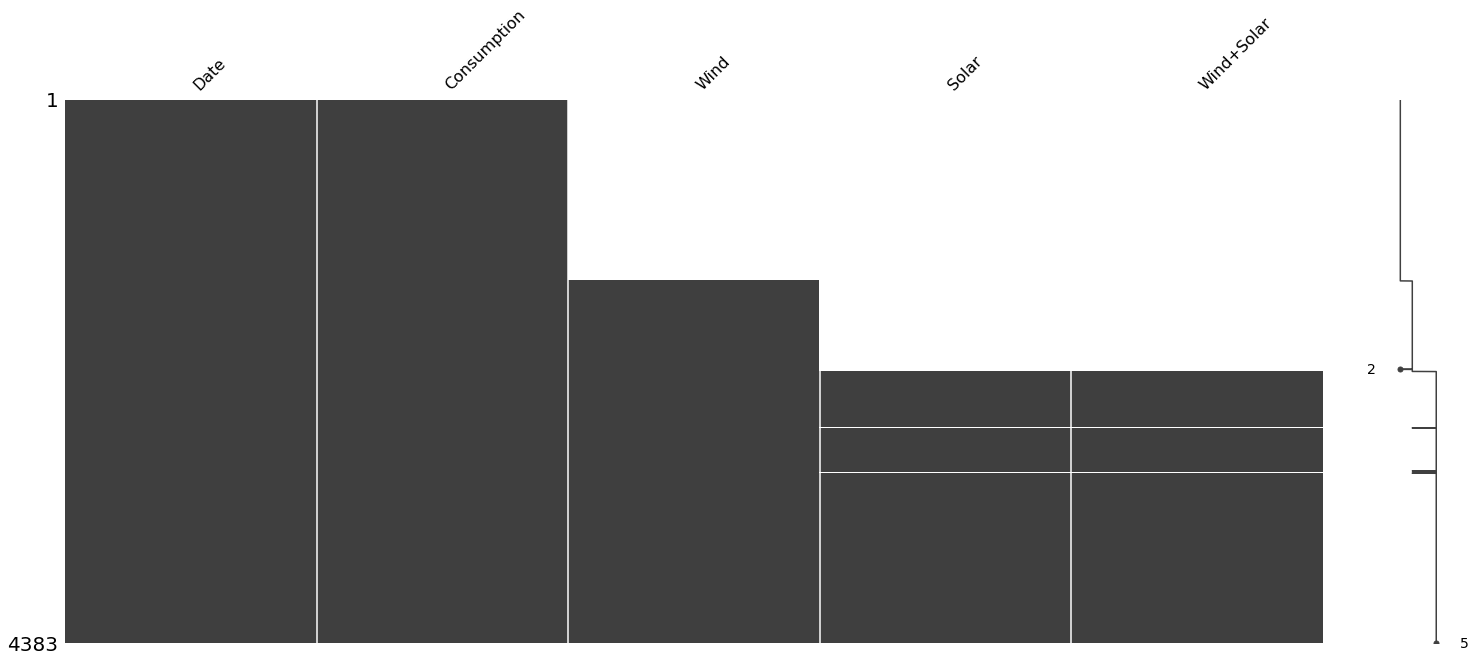

In [8]:
import missingno as msno
msno.matrix(df)

In [3]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Weekday'] = df.Date.dt.weekday
df['Hour'] = df.Date.dt.hour
df['DayOfYear'] = df.Date.dt.dayofyear
df.tail()

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday,Hour,DayOfYear
4378,2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2,0,361
4379,2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3,0,362
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4,0,363
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,5,0,364
4382,2017-12-31,1107.11488,721.176,19.980,741.156,2017,12,6,0,365


In [10]:
len(df.Date), len(set(df.Date))

(4383, 4383)

In [11]:
# df = df.set_index('Date')
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday,Hour
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6,0
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0,0
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1,0
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2,0
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3,0


In [12]:
df[df['Year'] == 2016].groupby('Month').count()

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Weekday,Hour
Month,,,,,,,,
1,31,31,31,31,31,31,31,31
2,29,29,29,29,29,29,29,29
3,31,31,31,31,31,31,31,31
4,30,30,30,30,30,30,30,30
5,31,31,31,31,31,31,31,31
6,30,30,30,30,30,30,30,30
7,31,31,31,31,31,31,31,31
8,31,31,31,31,31,31,31,31
9,30,30,30,30,30,30,30,30


<AxesSubplot:>

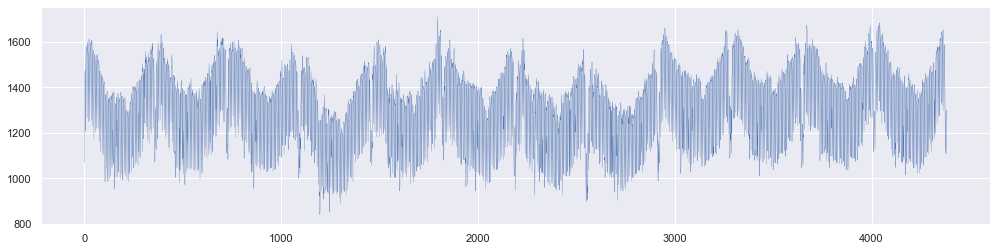

In [13]:
# df_yearly = df.groupby('Year').agg(['sum']).reset_index()
# df_yearly.plot(x='Year', y='Consumption')
# sns.relplot(x='Year', y='Consumption', data=df)

sns.set(rc={'figure.figsize':(17, 4)})
df.Consumption.plot(linewidth=0.3)

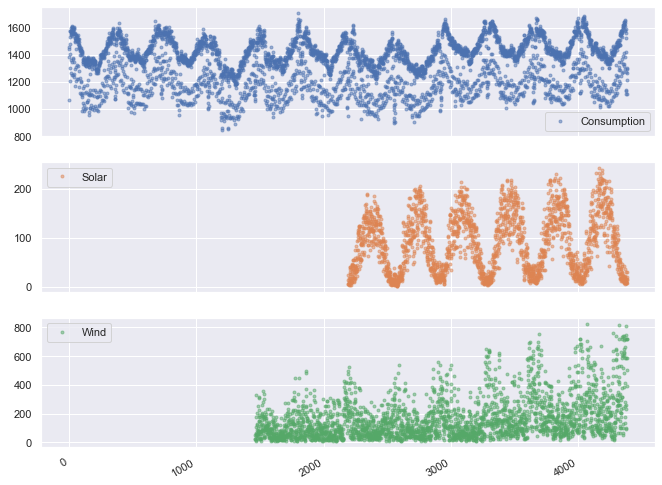

In [14]:
axes = df[['Consumption', 'Solar', 'Wind']].plot(marker='.', 
                          alpha=0.5, 
                          linestyle='None', 
                          figsize=(11, 9), 
                          subplots=True)

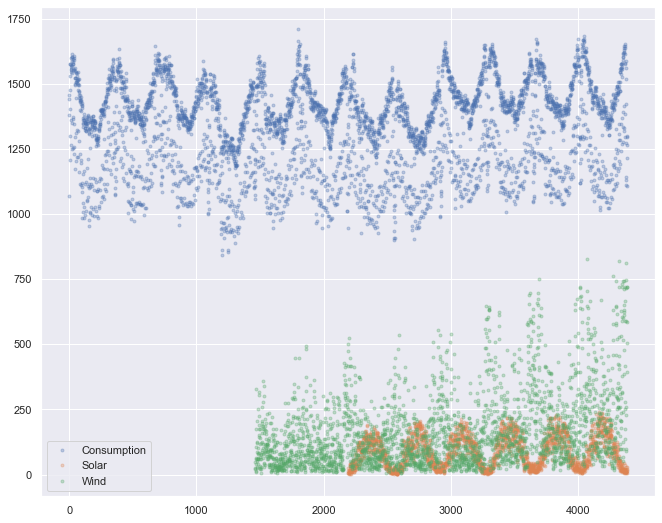

In [15]:
axes = df[['Consumption', 'Solar', 'Wind']].plot(marker='.', 
                          alpha=0.3, 
                          linestyle='None', 
                          figsize=(11, 9), 
                          subplots=False)

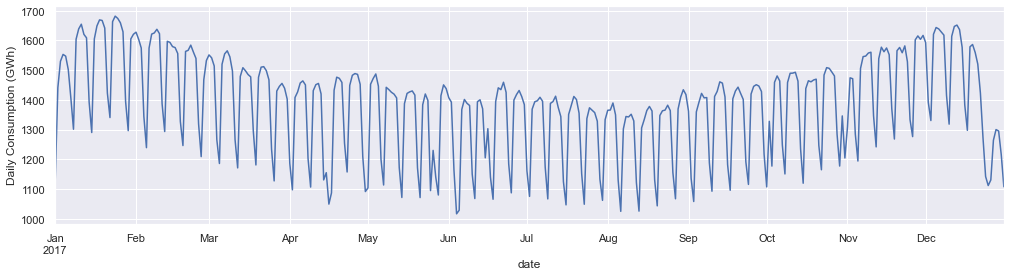

In [20]:
df['date'] = df.Date.copy()
df = df.set_index('date')
ax = df.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

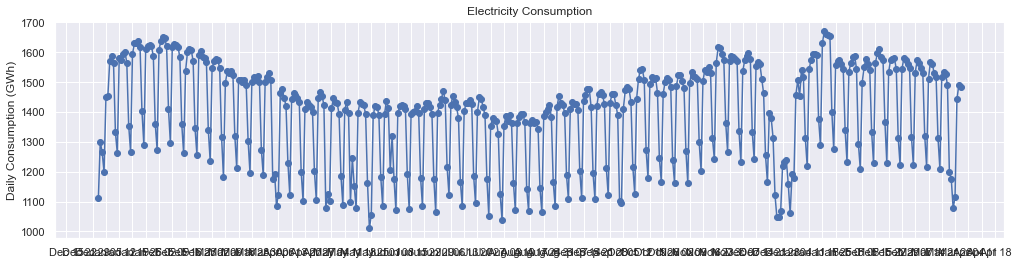

In [21]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(df.loc['2015-01':'2016-03', 'Consumption'], 
        marker='o', 
        linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Electricity Consumption')

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

<AxesSubplot:xlabel='date', ylabel='Consumption'>

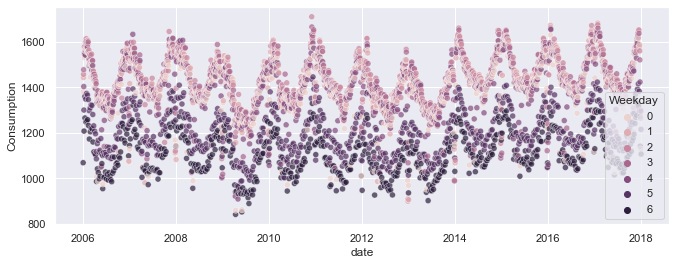

In [22]:
sns.set(rc={'figure.figsize':(11, 4)})
sns.scatterplot(x=df.index, 
                y='Consumption', 
                data=df, 
                hue='Weekday', alpha=0.7)

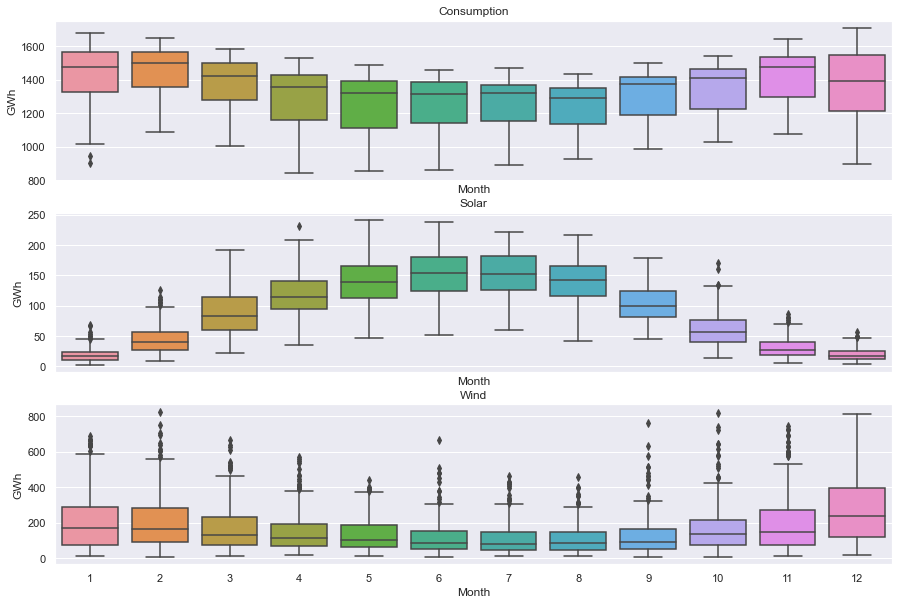

In [23]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=df, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

In [24]:
# df['DayOfYear'] = df.Date.dt.dayofyear
# rol = df.rolling(window=7, center=True, win_type='triang').mean()
# piv = pd.pivot_table(rol,
#                      index=['DayOfYear'],
#                      columns=['Year'], 
#                      values=['Consumption'])
# piv.plot(figsize=(15, 45), subplots=True)

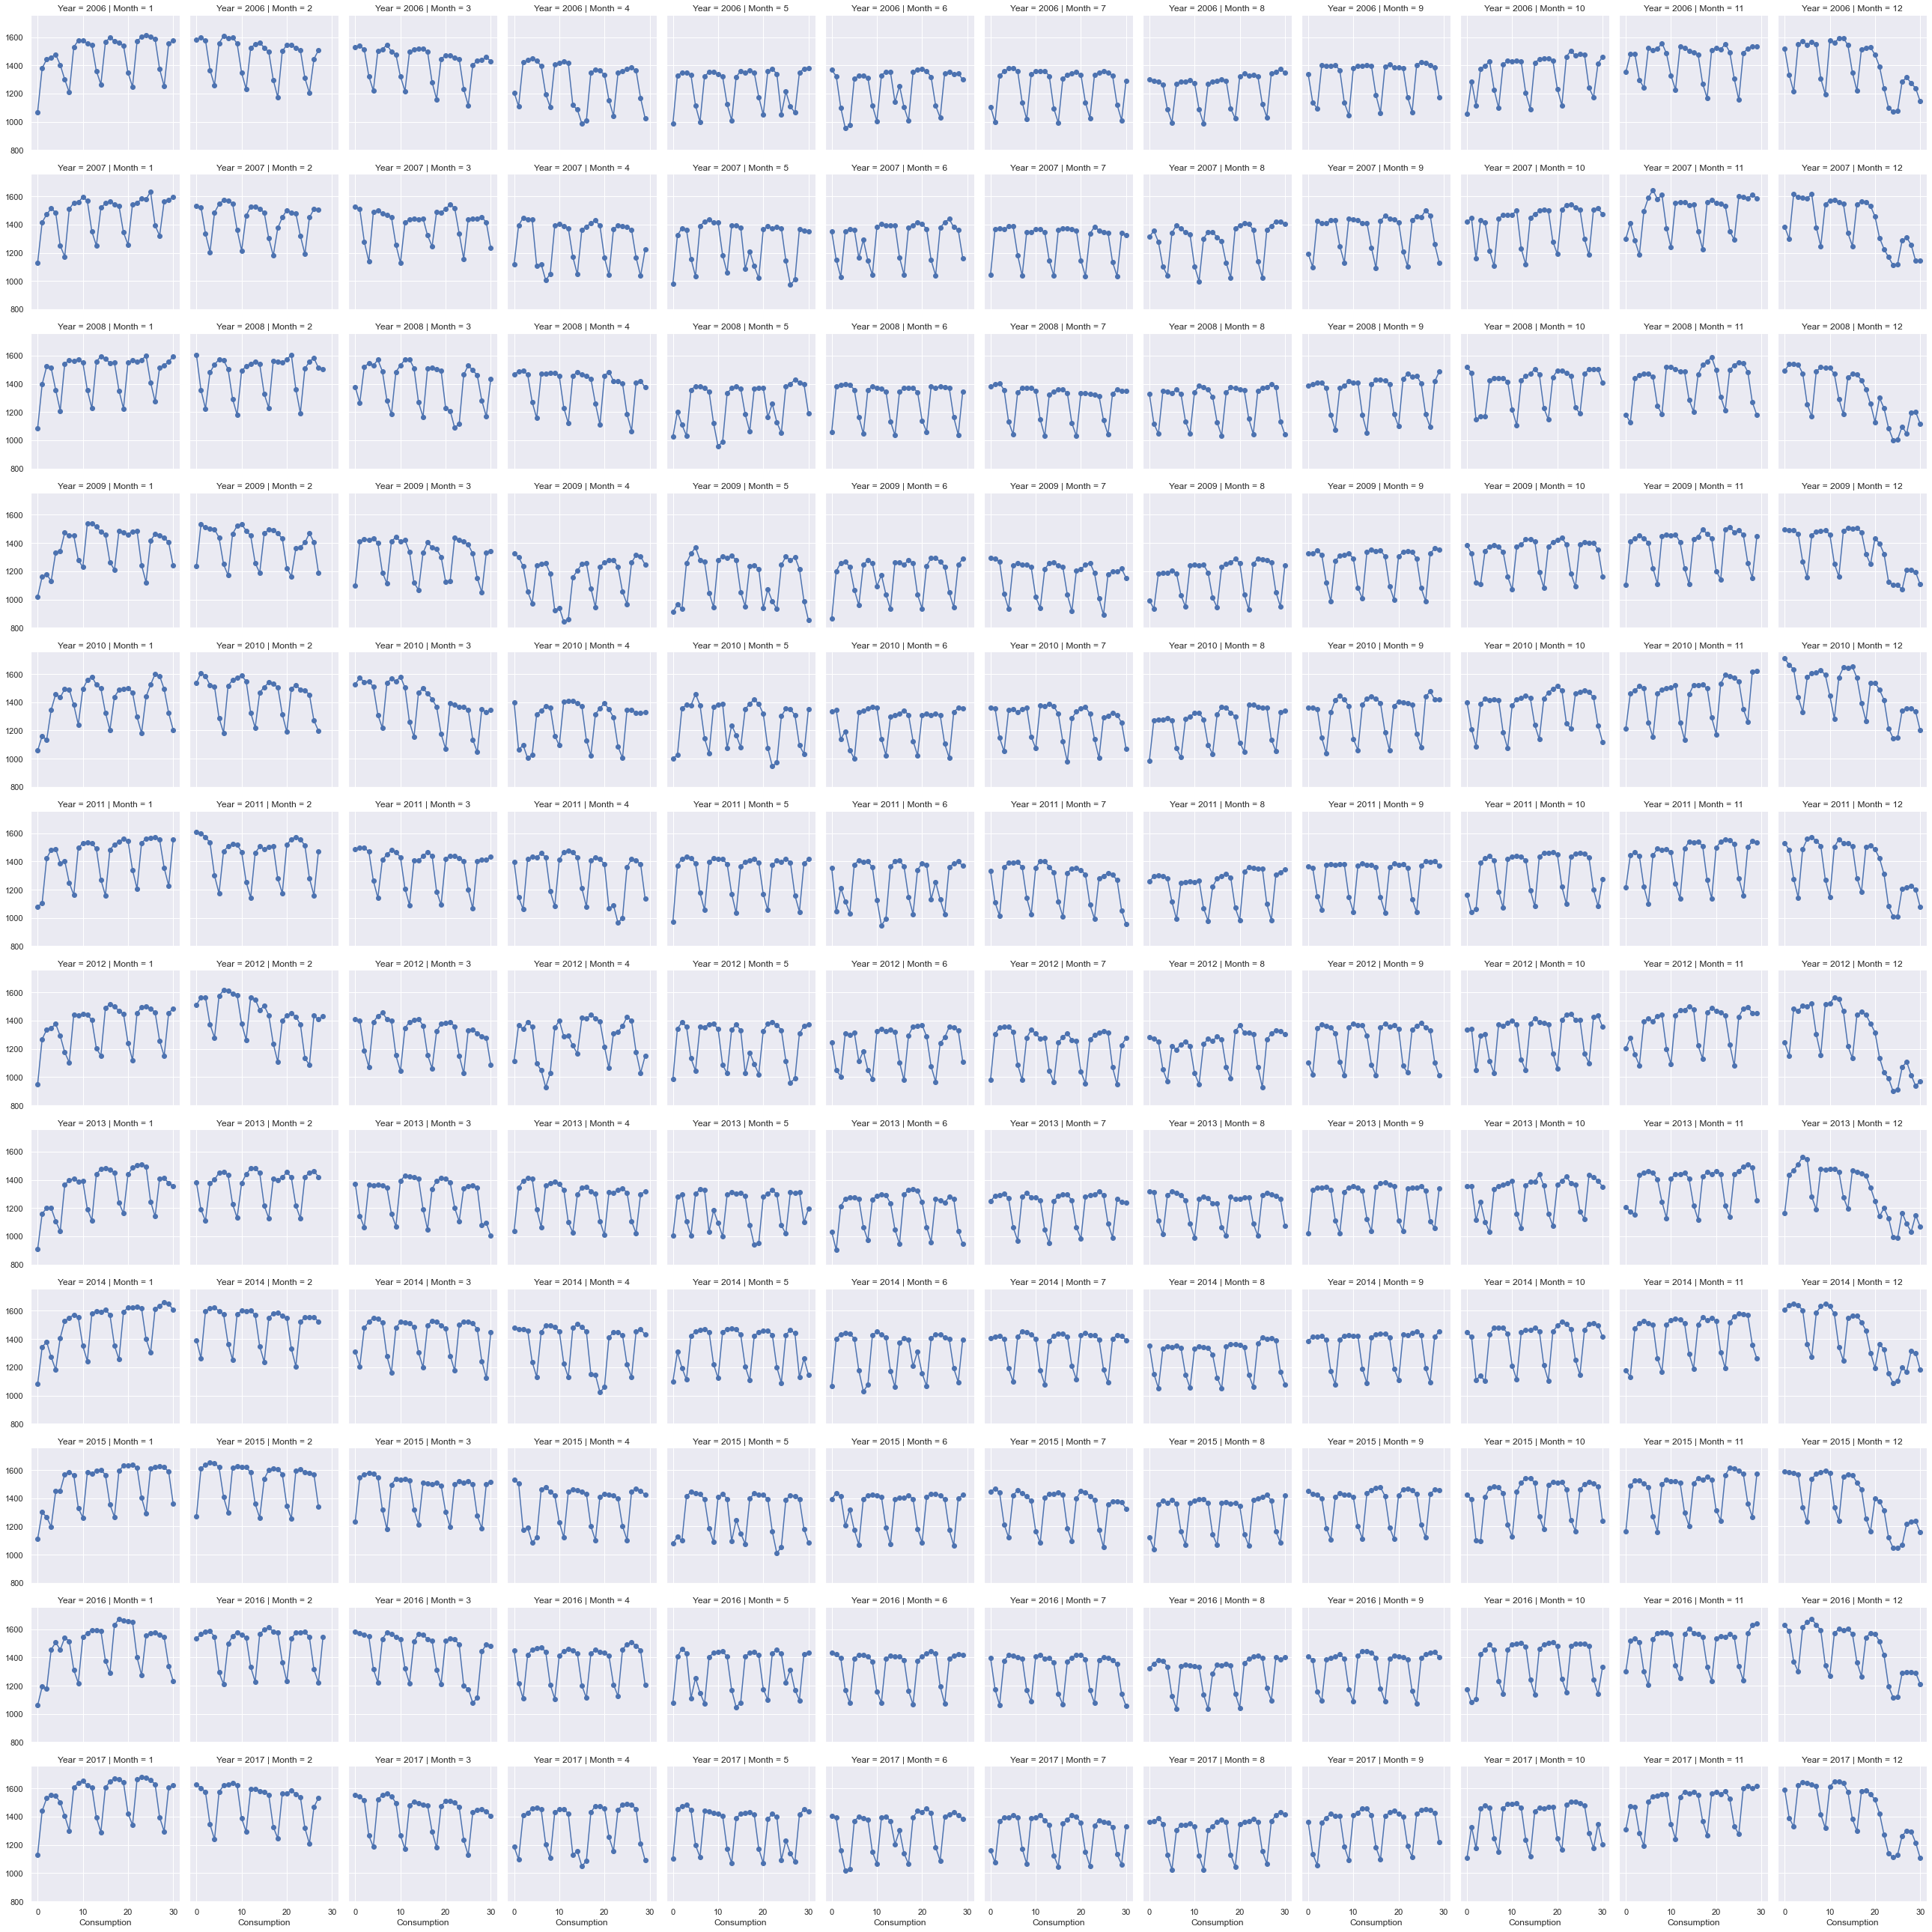

In [25]:
grid = sns.FacetGrid(df, 
                     col="Month", 
                     row="Year", 
                     palette="tab20c",)
grid.map(plt.plot, "Consumption", marker="o")

<AxesSubplot:xlabel='Weekday', ylabel='Consumption'>

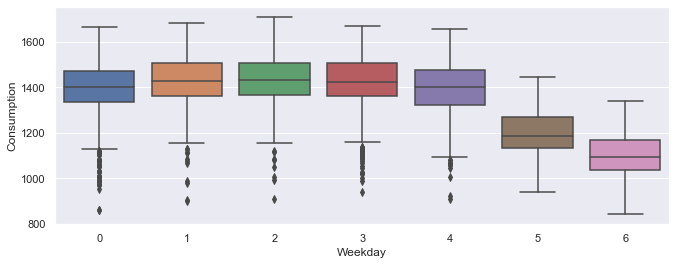

In [26]:
sns.boxplot(x="Weekday", y="Consumption", data=df)
# sns.violinplot(x="Weekday", y="Consumption", data=df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

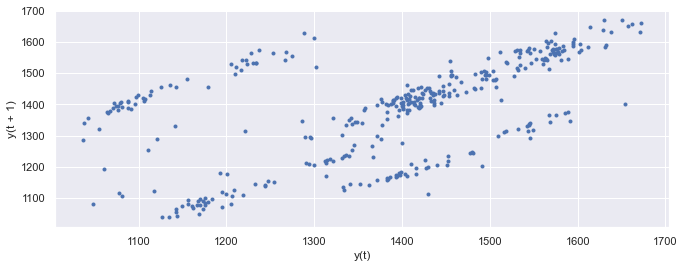

In [36]:
from pandas.plotting import lag_plot, autocorrelation_plot

# lag_plot(df.Consumption, marker='.')
lag_plot(df[(df.Date >= '2016-01-01')&(df.Date < '2017-01-01')].Consumption, marker='.')

<AxesSubplot:xlabel='Date', ylabel='Consumption'>

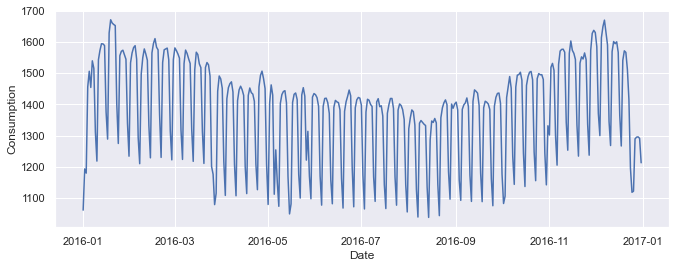

In [31]:
df_sample = df[(df.Date >= '2016-01-01')&(df.Date < '2017-01-01')]
sns.lineplot(data=df_sample, x='Date', y='Consumption')

<AxesSubplot:xlabel='Weekday', ylabel='Consumption'>

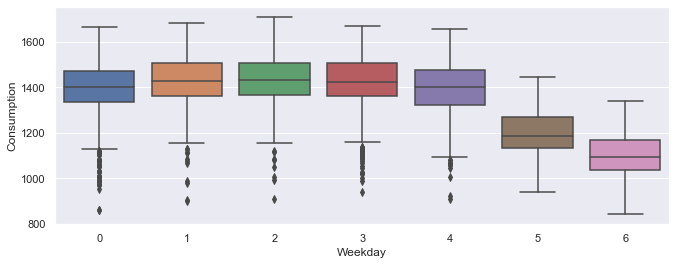

In [37]:
sns.boxplot(data=df, x='Weekday', y='Consumption')

<AxesSubplot:xlabel='Month', ylabel='Consumption'>

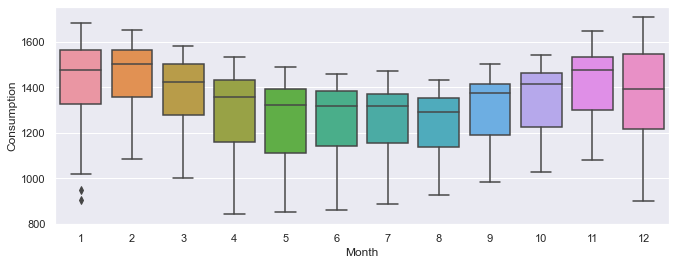

In [33]:
sns.boxplot(data=df, x='Month', y='Consumption')

<AxesSubplot:xlabel='Year', ylabel='Consumption'>

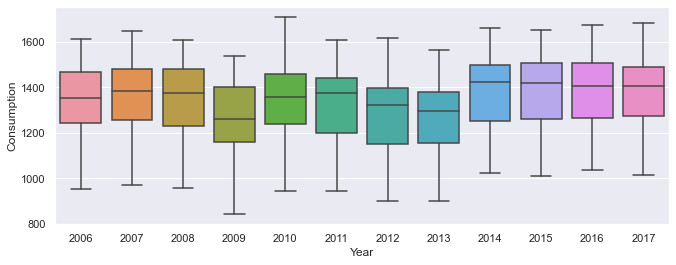

In [34]:
sns.boxplot(data=df, x='Year', y='Consumption')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 7)'>

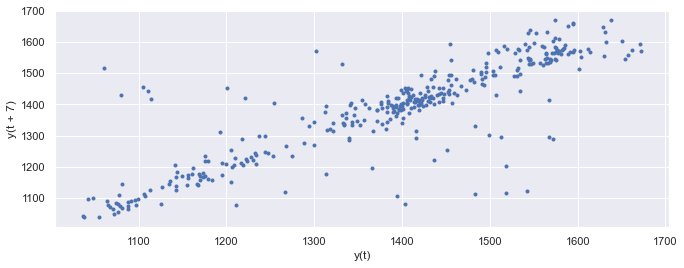

In [28]:

lag_plot(df[(df.Date >= '2016-01-01')&(df.Date < '2017-01-01')].Consumption, 
            marker='.',
         lag=7
        )
# Autocorrelation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

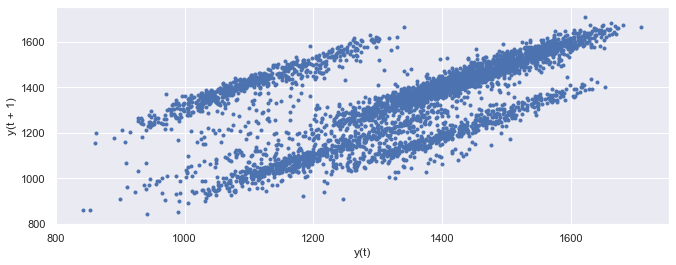

In [29]:
lag_plot(df.Consumption, 
            marker='.',
#          lag=7
        )

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

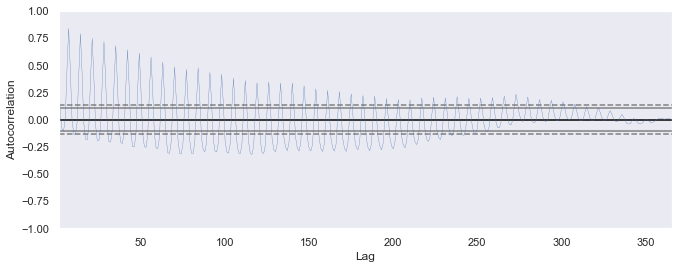

In [30]:
autocorrelation_plot(df[(df.Date >= '2016-01-01')&(df.Date < '2017-01-01')].Consumption, 
                     linewidth=0.3)

In [4]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday,Hour,DayOfYear
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6,0,1
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0,0,2
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1,0,3
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2,0,4
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3,0,5


<AxesSubplot:xlabel='DayOfYear'>

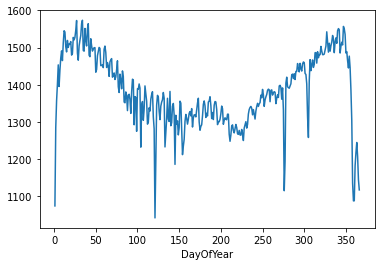

In [20]:
df.groupby('DayOfYear').Consumption.median().plot()

<AxesSubplot:xlabel='Month'>

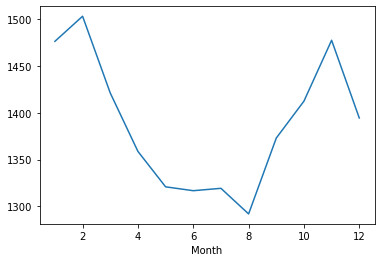

In [19]:
df.groupby('Month').Consumption.median().plot()

In [37]:
byday = df.pivot(index='DayOfYear', columns='Year', values='Consumption')
byday

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
DayOfYear,,,,,,,,,,,,
1,1069.184,1128.843,1083.424,1018.975,1057.372,1080.314,948.128,906.910,1080.080,1111.336,1060.366,1130.41300
2,1380.521,1416.669,1396.483,1161.911,1161.042,1104.799,1269.581,1160.174,1343.101,1300.884,1192.698,1441.05200
3,1442.533,1471.586,1523.427,1178.078,1132.069,1422.242,1334.745,1199.565,1379.776,1265.271,1179.282,1529.99000
4,1457.217,1514.823,1512.429,1130.021,1346.250,1482.161,1347.136,1198.952,1271.029,1198.854,1456.294,1553.08300
5,1477.131,1484.168,1355.843,1333.041,1457.374,1489.005,1376.658,1108.271,1182.416,1449.861,1506.737,1547.23800
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1314.603,1308.594,1097.525,1211.791,1357.764,1216.645,1068.617,1089.790,1168.079,1219.075,1289.324,1299.86398
363,1274.646,1256.510,1047.014,1207.905,1357.192,1226.888,1109.424,1031.149,1316.093,1233.660,1294.881,1295.08753
364,1237.751,1142.201,1198.295,1192.196,1332.367,1199.866,1014.550,1149.097,1300.367,1238.863,1295.897,1215.44897


<AxesSubplot:xlabel='Year', ylabel='DayOfYear'>

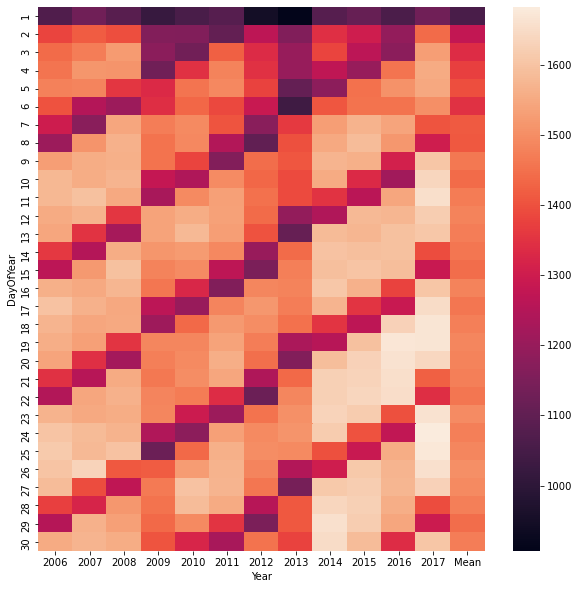

In [40]:
plt.figure(figsize=(10, 10))
sns.heatmap(byday.iloc[:30,:])